In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

warnings.filterwarnings("ignore")
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [3]:
country = pd.read_csv("D:\Kuliah\BasicStats\EVEN_FinalProj\datasets\GlobalLandTemperaturesByCountry.csv")
country["dt"] = pd.to_datetime(country["dt"])
country.set_index("dt", inplace=True)
country

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1743-11-01,4.384,2.294,Åland
1743-12-01,NaN,NaN,Åland
1744-01-01,NaN,NaN,Åland
1744-02-01,NaN,NaN,Åland
1744-03-01,NaN,NaN,Åland
...,...,...,...
2013-05-01,19.059,1.022,Zimbabwe
2013-06-01,17.613,0.473,Zimbabwe
2013-07-01,17.000,0.453,Zimbabwe


<AxesSubplot:xlabel='dt'>

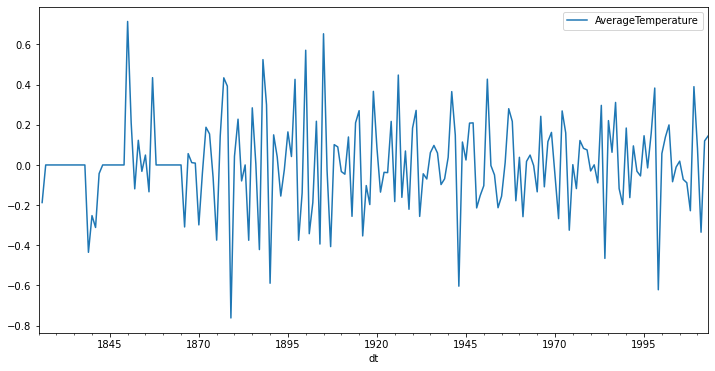

In [4]:
# filtering the dataframe to show only Indonesia
indo = country.copy()
indo = indo.loc[indo["Country"] == "Indonesia"]
indo.fillna(method='bfill', inplace=True)

# resampling the data to show the average temp of each decade
filtered = indo.resample("A").mean()
filtered.drop("AverageTemperatureUncertainty", axis=1, inplace=True)

# first order of differentials
filtered.diff().plot(figsize=(12, 6))

In [5]:
# finding the p value to proceed with differencing
result = adfuller(filtered.AverageTemperature.values)
print("ADF Statistic: %f" %result[0])
print("p-value: %f" %result[1])

ADF Statistic: -1.155791
p-value: 0.692318


In [6]:
# 112 ARIMA model
model = ARIMA(filtered.AverageTemperature, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARIMA Model Results                               
Dep. Variable:     D.AverageTemperature   No. Observations:                  188
Model:                   ARIMA(1, 1, 1)   Log Likelihood                  25.748
Method:                         css-mle   S.D. of innovations              0.211
Date:                  Thu, 18 Nov 2021   AIC                            -43.496
Time:                          23:11:06   BIC                            -30.551
Sample:                      12-31-1826   HQIC                           -38.251
                           - 12-31-2013                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0051      0.007      0.714      0.475      -0.009       0.019
ar.L1.D.AverageTemperature     0.2768      0.136      2.030      0.

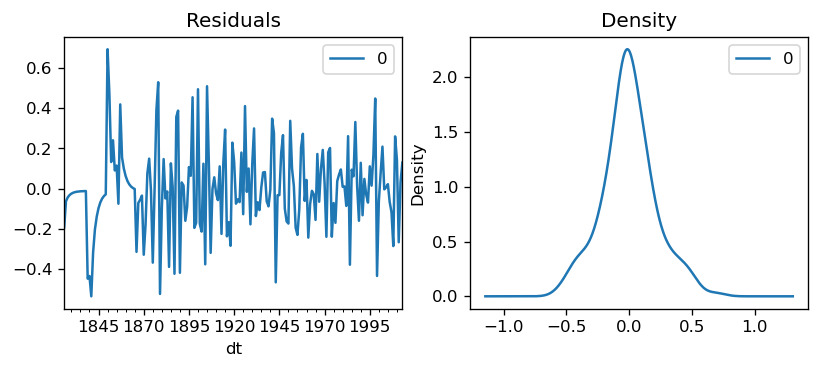

In [7]:
residuals = pd.DataFrame(model_fit.resid)
plt.rcParams.update({"figure.figsize": (8, 3), 'figure.dpi':120})
fig, ax = plt.subplots(1, 2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title="Density", ax=ax[1])
plt.show()

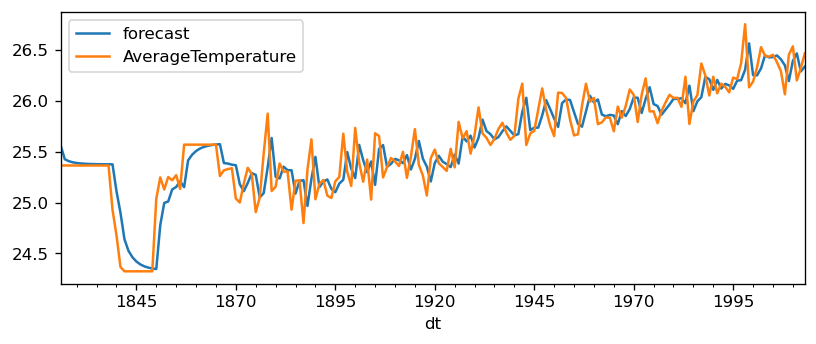

In [9]:
model_fit.plot_predict(dynamic=False)
plt.show()